In [1]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
from processXYZLines import processXYZLines
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import RANSACRegressor
from skimage.measure import LineModelND, ransac

In [4]:
#This version uses the XYZ csv



data_csv_xyz = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25 314 568

#data_csv_xyz = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_xyz.readCSV()

entry_nr = 568

singular_entry_xyz = data_csv_xyz.m_data[data_csv_xyz.m_data["entry_nr"]==entry_nr]


if singular_entry_xyz.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  568  was found in the 'entry_nr' column.


For i =  0  the parameters are  [ 8.82831712 54.70397121 37.93936364]  and  [0.57423769 0.67998104 0.45593514] 

For i =  1  the parameters are  [14.69504706 68.95135882 47.62515882]  and  [-0.36985402  0.82175387  0.4335073 ] 



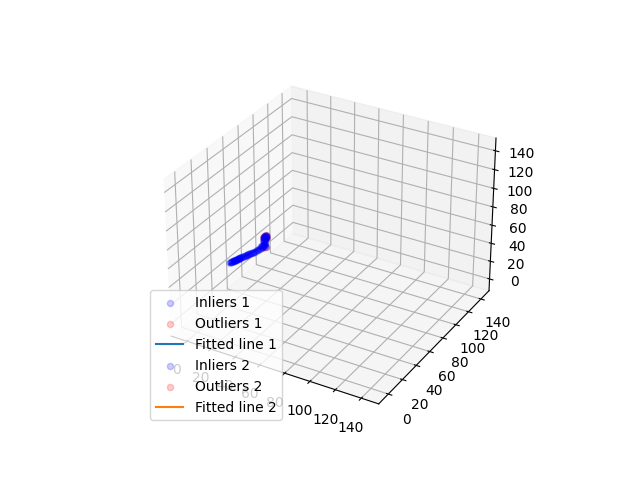

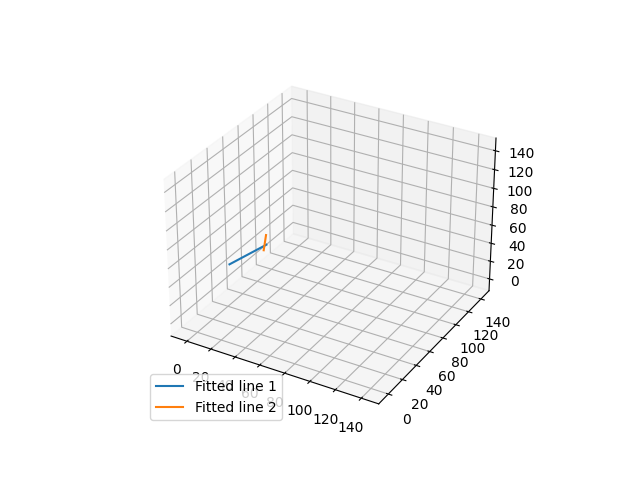

In [5]:
#Use RANSAC in 3D to fit a line to the data set. Format is XYZ.
%matplotlib widget
line_proc_xyz = processXYZLines(singular_entry_xyz)

nr_lines=2

verbose = True


fig = plt.figure()
model_xyz = line_proc_xyz.fitNLines(fig, nr_lines, False, 4, 2.5)

if(verbose):
    for i in range(len(model_xyz)):
        print("For i = ", i, " the parameters are ", model_xyz[i].model_container.params[0], " and ", model_xyz[i].model_container.params[1], "\n")


fig_scat = plt.figure()
line_proc_xyz.fitNLines(fig_scat, nr_lines, True, 4, 2.5)

plt.show()